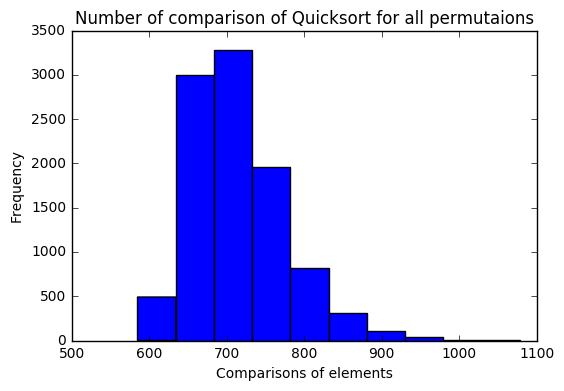

('n', 100)
('runs', 10000)
('mean', 714.0397)
('stdev', 60.162437415696346)
('min', 585)
('max', 1078)


In [5]:
import random
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

def randomquicksort(alist,times):
    comp = [0]
    randomquicksorthelper(alist,0,len(alist)-1,comp)
    times.append(comp[0])

def randomquicksorthelper(alist,first,last,comp):
    if first<last:

        r = randompartition(alist,first,last)
        splitpoint = r[0]
        tmp = comp.pop()
        comp.append(tmp+r[1])
    
        randomquicksorthelper(alist,first,splitpoint-1,comp)
        randomquicksorthelper(alist,splitpoint+1,last,comp)
    
def randompartition(alist,first,last):
  
    indxpiv = random.randint(first,last)
    temp = alist[indxpiv]
    alist[indxpiv] = alist[first]
    alist[first] = temp
   
    pivot = alist[first]
    comp = 0

    lt = first+1
    gt = last
    
    i = first
    
    while i <= gt:
        if alist[i] < pivot:
            temp = alist[lt]
            alist[lt] = alist[i]
            alist[i] = temp
            
            lt += 1
            i += 1
            comp += 1
        elif alist[i] > pivot:
            temp = alist[i]
            alist[i] = alist[gt]
            alist[gt] = temp
            gt -= 1
            comp += 1
            
        elif alist[i] == pivot:
            i += 1
            comp += 1


    return gt,comp

def randomquicksorttimedistrib(s,r):
    
    # Create an array of 1 .. n  
    n=s
    runs=r
    x = []
    for i in range(1,n+1):
        x.append(n+1-i)
    
     # Run quicksort for each permutation
    tlist =[]
    for p in range(1,runs+1):
        y = list(x)
        randomquicksort(y,tlist)
          
        
    plt.hist(tlist)
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Frequency")
    plt.show()
    
    print("n",n)
    print("runs",runs)
    print("mean",statistics.mean(tlist))
    print("stdev",statistics.stdev(tlist))
    print("min",min(tlist))
    print("max",max(tlist))
    
randomquicksorttimedistrib(100,10000)